# Let's get started! ⚡

In [231]:
## import Module

# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine Learning
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier

# Data Reading

In [232]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [233]:
# 헤드 확인
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [234]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


# Exploratory Data Analysis 📊🤔

## 데이터 정리

In [235]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

In [236]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

### 기본 정보 확인

In [237]:
data.describe()

Pclass          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881138     0.498854     0.385027    33.295479
std       0.837836    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### 결측치 채우기 위한 분석

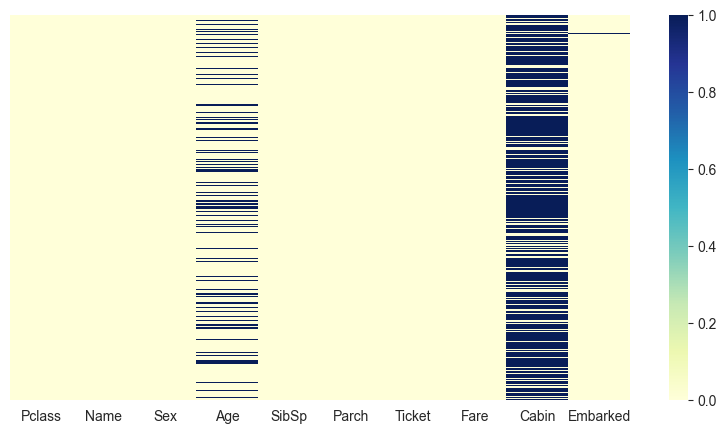

In [239]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
palette=sns.color_palette("pastel")
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [240]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [241]:
data[data.Embarked.isna()]

Pclass                                       Name     Sex   Age  SibSp  \
61        1                        Icard, Miss. Amelie  female  38.0      0   
829       1  Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0      0   

     Parch  Ticket  Fare Embarked  
61       0  113572  80.0      NaN  
829      0  113572  80.0      NaN

In [242]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

Embarked
S    177
C    141
Q      3
Name: count, dtype: int64

<Axes: xlabel='Sex'>

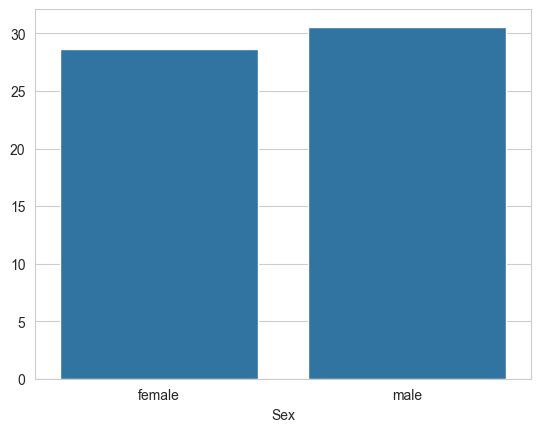

In [243]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [244]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

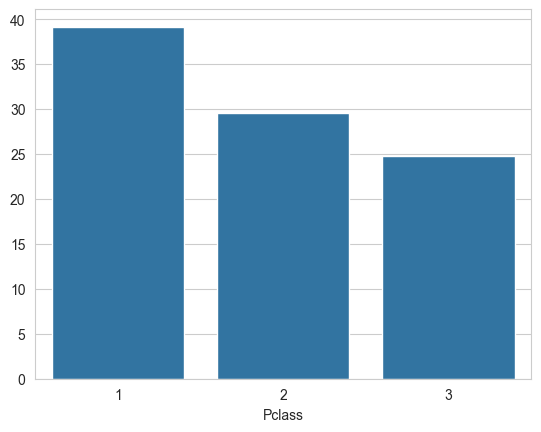

In [245]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [246]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [247]:
data[data.Fare.isna()]

Pclass                Name   Sex   Age  SibSp  Parch Ticket  Fare  \
152       3  Storey, Mr. Thomas  male  60.5      0      0   3701   NaN   

    Embarked  
152        S

<Axes: xlabel='Fare', ylabel='Count'>

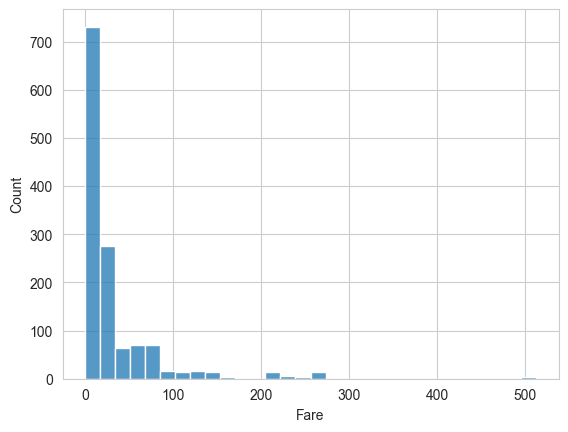

In [248]:
sns.histplot(data.Fare,bins=30)

In [249]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

### 학습데이터만 떼어서 분석

In [250]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

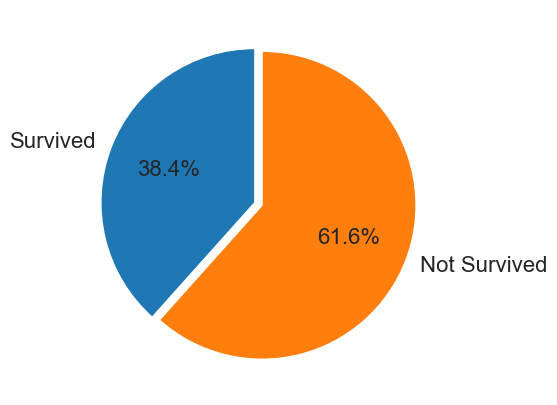

In [251]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart 
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [252]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [253]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [254]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

mean  min       max
Survived                          
0         22.117887  0.0  263.0000
1         48.395408  0.0  512.3292

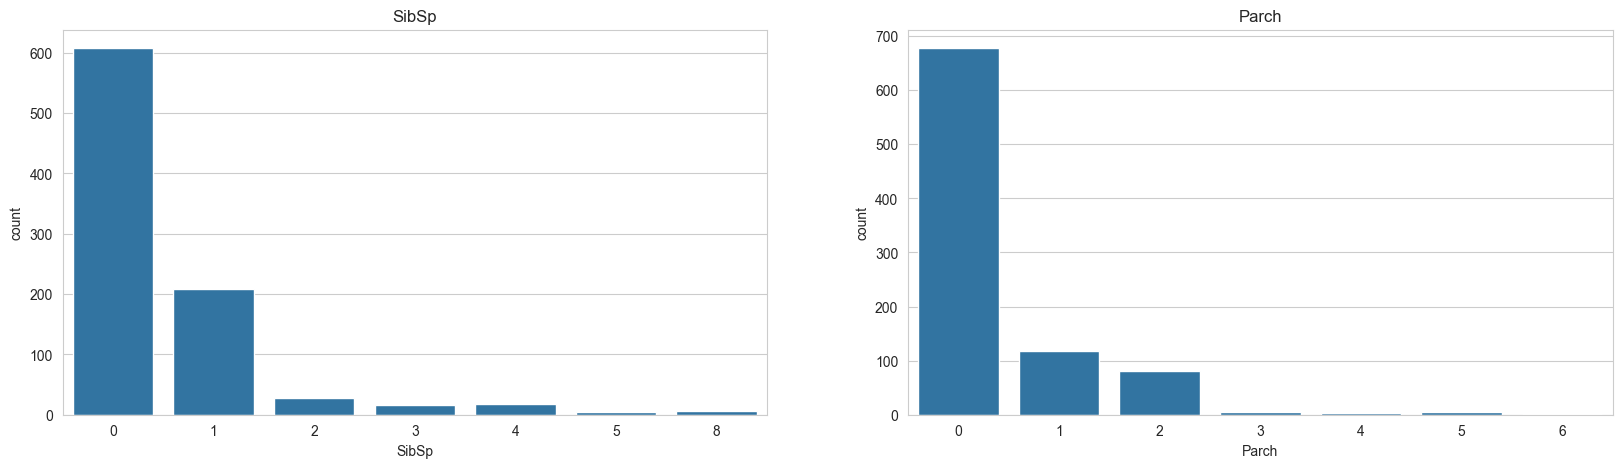

In [255]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0]) 
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [256]:
data_exp.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: count, Length: 730, dtype: int64

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

### 학습데이터와 테스트데이터 합치기

In [257]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    df = pd.concat([df_train, df_test], axis=0, sort=False).reset_index(drop=True)
    df['PassengerId'] = df['PassengerId'].astype(int)
    return df

### 잘못된 승객정보 정정

In [258]:
# 잘못된 승객정보 정정
# thanks to @Nadezda Demidova : https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn
def correct_wrong_passenger_info(df=None):
    df.loc[df['PassengerId'] == 631, 'Age'] = 48

    # Passengers with wrong number of siblings and parch
    df.loc[df['PassengerId'] == 69, ['SibSp', 'Parch']] = [0,0]
    df.loc[df['PassengerId'] == 1106, ['SibSp', 'Parch']] = [0,0]
    
    return df

### 'Title' 컬럼 생성

In [259]:
# 'Name' 컬럼에서 'Title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'Title' 생성하는 함수
def get_Title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if title in top4_titles:
        return title
    elif title in female_titles_to_Mrs:
        return 'Mrs'
    elif title in female_titles_to_Miss:
        return 'Miss'
    elif title in male_titles_to_Mr:
        return 'Mr'
    else:
        return title

In [260]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['Title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['Title'].isin(title_on_both_side))
    
    # 치환
    df.loc[cond_mr, 'Title'] = 'Mr'
    df.loc[cond_mrs, 'Title'] = 'Mrs'
    
    return df

In [261]:
# 'Title'(호칭) 생성
def make_Title(df=None):
    df['Title'] = df['Name'].map(get_Title)
    
    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_title_on_both_side(df)
    
    return df

### 단일 피쳐 생성

In [262]:
# 'Surname'(성씨) 생성
def make_Surname(df=None):
    df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
    return df

In [263]:
# 'Family', 'IsAlone' 생성
def make_Family_IsAlone(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int)
    # df['IsAlone'] = (df['Family'] <= 1).astype(int)
    return df

### 피쳐 튜닝

In [264]:
# 'Cabin' 컬럼 매핑
def mapping_Cabin(df=None):
    # 결측치를 전부 'U'로 대체
    df['Cabin'] = df['Cabin'].fillna('U')
    # 첫 알파벳(Deck)만 추출
    df['Cabin'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    cabin_category = {'A':9, 'B':8, 'C':7, 'D':6, 'E':5, 'F':4, 'G':3, 'T':2, 'U':1}
    # Mapping
    df['Cabin'] = df['Cabin'].map(cabin_category)
    return df

## 1차 전처리 함수 모음

In [265]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)
    
    # 잘못된 승객정보 정정
    df = correct_wrong_passenger_info(df)
    
    # 호칭 만들기
    df = make_Title(df)
    
    # 'Surname'(성씨) 생성
    df = make_Surname(df)
    
    # 'Family', 'IsAlone' 생성
    df = make_Family_IsAlone(df)
    
    # 'Cabin' 컬럼 매핑
    # df = mapping_Cabin(df)
       
    return df

In [266]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

### 'Age' 결측치 채우기 위한 확인

In [267]:
df.groupby('Title')['Age'].agg({'mean', 'median'})

mean  median
Title                    
Master   5.482642     4.0
Miss    21.824366    22.0
Mr      32.731405    30.0
Mrs     37.040000    36.0

### 'Fare' 결측치 채우기 위한 확인

In [268]:
df.groupby('Pclass')['Fare'].agg({'mean', 'median', 'max'})

mean       max   median
Pclass                              
1       87.508992  512.3292  60.0000
2       21.179196   73.5000  15.0458
3       13.302889   69.5500   8.0500

### 'Embarked' 결측치 채우기 위한 확인

In [269]:
df.loc[df['Embarked'].isnull()][['Name', 'Pclass', 'Sex', 'Title']]

Name  Pclass     Sex Title
61                         Icard, Miss. Amelie       1  female  Miss
829  Stone, Mrs. George Nelson (Martha Evelyn)       1  female   Mrs

In [270]:
df.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           177
        C           141
        Q             3
2       S           242
        C            28
        Q             7
3       S           495
        Q           113
        C           101
Name: count, dtype: int64

## 2차 전처리 함수 선언

### 결측치 채우기

In [271]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median())) 
    df['Age'] = df['Age'].astype('int64')    
    return df

In [272]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean())) 
    return df

In [273]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df=None):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    return df

In [274]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 'Family_Survival' 컬럼 생성
---
* 이 컬럼에 대한 자세한 정보는 https://www.kaggle.com/code/shunjiangxu/blood-is-thicker-than-water-friendship-forever/notebook 를 참고하세요.
---

In [275]:
# 'Family_Survival' 컬럼 생성
def make_Family_Survival(df=None):
    def_survive_val = 0.5
    df['Family_Survival'] = def_survive_val
    survive_df = df[['Survived', 'Name', 'Surname'
                     , 'Fare', 'Ticket', 'PassengerId'
                     , 'SibSp', 'Parch', 'Age', 'Cabin']]
    
    for grp, grp_df in survive_df.groupby(['Surname', 'Fare']):
        if (len(grp_df) != 1):
            # 가족 그룹(같은 성씨, Fare 2명 이상)을 찾았다.
            for idx, row in grp_df.iterrows():
                max_sur = grp_df.drop(idx)['Survived'].max()
                min_sur = grp_df.drop(idx)['Survived'].min()
                passID = row['PassengerId']
                # 다른 가족의 생존 여부를 이 컬럼에 기록함
                if (max_sur == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (min_sur == 0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0
                    
    for _, grp_df in df.groupby('Ticket'):
        if (len(grp_df) != 1):
            # 같은 티켓번호를 가진 다른 사람을 찾았다.
            for idx, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                    max_sur = grp_df.drop(idx)['Survived'].max()
                    min_sur = grp_df.drop(idx)['Survived'].min()
                    passID = row['PassengerId']
                    # 같은 티켓번호를 가진 다른 사람의 생존 여부를 이 컬럼에 기록함
                    if (max_sur == 1.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                    elif (min_sur == 0.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0
                    
    return df

### 추가 피쳐 생성 및 매핑

In [276]:
# 카테고리화 피쳐 생성
def make_categorical_columns(df=None):
    # 'Age_Cat' 생성
    df['Age_Cat'] = pd.qcut(df['Age'], 4)
    # 'Fare_Cat' 생성
    df['Fare_Cat'] = pd.qcut(df['Fare'], 4)
    return df

### 레이블 인코딩

In [277]:
# 레이블 인코딩
def label_encoder(df=None):
    encoder = LabelEncoder()
    columns = ['Sex', 'Embarked', 'Title', 'Fare_Cat', 'Age_Cat']
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    
    return df

### 컬럼명을 강제로 str로 형변환

In [278]:
# 컬럼명을 강제로 str로 형변환
# 알고리즘에 따라 이 작업이 필요합니다.
def columns_index_to_str_type(df=None):
    df.columns = df.columns.astype(str)
    return df

### 필요없는 컬럼들 드랍

In [279]:
# 필요없는 컬럽들 드랍
def drop_columns(df=None):
    columns = ['Title', 'Fare', 'Age', 'Name'
               , 'PassengerId', 'SibSp', 'Parch'
               , 'Ticket', 'Cabin', 'Embarked', 'Surname']
    df.drop(columns=columns, inplace=True)
    
    return df

## 2차 전처리 함수 모음

In [280]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)
    
    # 'Family_Survival' 컬럼 생성
    df = make_Family_Survival(df)
    
    # 카테고리화 컬럼 생성
    df = make_categorical_columns(df)
    
    # 레이블 인코딩
    df = label_encoder(df)
    
    # 컬럼명을 강제로 str로 형변환
    df = columns_index_to_str_type(df)
    
    # 필요없는 컬럼들 드랍
    df = drop_columns(df)
    
    return df

In [281]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 전처리 결과 확인

### 결측치 존재여부 확인

In [282]:
# df.isnull().sum()

### 피어슨 계수 행렬 시각화

In [283]:
# 피어슨 계수 행렬 시각화
def plot_Pearson_heatmap(df=None):
    corr_matrix = pd.get_dummies(df).corr(method='pearson')

    plt.figure(figsize=(12, 12))
    sns.heatmap(
        corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
    )
    plt.title("Pearson Correlation Heatmap")
    plt.show()
    return

# plot_Pearson_heatmap(df)

### 데이터프레임 확인

In [284]:
df.head(3)

Survived  Pclass  Sex  Family  Family_Survival  Age_Cat  Fare_Cat
0       0.0       3    1       1              0.5        0         0
1       1.0       1    0       1              0.5        3         3
2       1.0       3    0       0              0.5        1         1

# Model Fitting

## 학습데이터와 테스트데이터 분리

In [285]:
# 학습데이터와 테스트데이터 분리
train_set = df.iloc[:df_train.shape[0],]
test_set = df.iloc[df_train.shape[0]:,]

# 학습데이터의 데이터와 답 분리
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']

# 테스트데이터 생성
X_test = test_set.drop(['Survived'], axis=1)

## Scaler

In [286]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## 공통 파라미터 선언

In [287]:
model_result = pd.DataFrame(columns=['Model','Score','Parameters'])

cv = RepeatedStratifiedKFold(
      n_splits=10
    , n_repeats=5
    , random_state=42
)

## GridsearchCV 함수

In [288]:
def GridSearch_CV(model=None, grid=None, X_train=None, y_train=None):
    grid_search = GridSearchCV(
          estimator=model
        , param_grid=grid
        , n_jobs=-1
        , cv=cv
        , scoring='accuracy'
        , error_score=0
    )
    grid_result = grid_search.fit(X_train, y_train)
    best_model = {
          'Model':model.__class__.__name__
        , 'Score':grid_result.best_score_
        , 'Parameters':grid_result.best_params_
        , 'best_estimator':grid_result.best_estimator_
    }
    return best_model

In [289]:
def make_model_submission(best_model=None, model_result=None, X_test=None):
    model = best_model['best_estimator']
    data = [
          best_model['Model']
        , best_model['Score']
        , best_model['Parameters']
    ]
    model_result.loc[len(model_result)] = data
    
    best_model_name = best_model['Model']
    best_model_score = best_model['Score']
    best_model_parameters = best_model['Parameters']
    
    print(f'#### {best_model_name} ####')
    print(f'Best score: {best_model_score:.5f}')
    print(f'Best parameters: {best_model_parameters}')
    
    model_submission = pd.read_csv('./gender_submission.csv')
    model_submission.Survived = model.predict(X_test)
    model_submission['Survived'] = model_submission['Survived'].astype(int)
    filename = f'{model.__class__.__name__}_submission.csv'
    model_submission.to_csv(filename, index=False)
    return model_result

## LogisticRegression

In [290]:
model = LogisticRegression()

solvers = ['lbfgs', 'liblinear', 'newton-cg']
penalty = ['l1','l2','elasticnet']
c_values = [14, 15, 16]

grid = dict(
      solver=solvers
    , penalty=penalty
    , C=c_values
)

best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = make_model_submission(best_model, model_result, X_test)

#### LogisticRegression ####
Best score: 0.82468
Best parameters: {'C': 14, 'penalty': 'l1', 'solver': 'liblinear'}


## RidgeClassifier

In [291]:
model = RidgeClassifier()

alpha = [1.13, 1.15, 1.18]
grid = dict(alpha=alpha)

best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = make_model_submission(best_model, model_result, X_test)

#### RidgeClassifier ####
Best score: 0.82894
Best parameters: {'alpha': 1.13}


## KNeighborsClassifier

In [310]:
model = KNeighborsClassifier()

n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
leaf_size = list(range(1,50,5))

grid = dict(
    n_neighbors=n_neighbors
  , algorithm=algorithm
  , weights=weights
  , metric=metric
  , leaf_size=leaf_size
)

best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = make_model_submission(best_model, model_result, X_test)

#### KNeighborsClassifier ####
Best score: 0.84668
Best parameters: {'algorithm': 'auto', 'leaf_size': 6, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


## DecisionTreeClassfier

In [293]:
model = DecisionTreeClassifier()

max_features = ['sqrt', 'log2']
max_depth = [3,6,12]
min_samples_leaf = [4,8,12]
min_samples_split = [3,6,9]

grid = dict(
    max_features=max_features
  , max_depth=max_depth
  , min_samples_leaf=min_samples_leaf
  , min_samples_split=min_samples_split
)

best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = make_model_submission(best_model, model_result, X_test)

#### DecisionTreeClassifier ####
Best score: 0.82963
Best parameters: {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3}


## RandomForestClassifier

In [294]:
model = RandomForestClassifier()

n_estimators = [300, 500, 1000]
max_features = ['sqrt', 'log2']

grid = dict(
    n_estimators=n_estimators
  , max_features=max_features
)

best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = make_model_submission(best_model, model_result, X_test)

#### RandomForestClassifier ####
Best score: 0.83592
Best parameters: {'max_features': 'sqrt', 'n_estimators': 100}


## BaggingClassifier

In [295]:
model = BaggingClassifier()

n_estimators = [1500, 1750]
grid = dict(n_estimators=n_estimators)

best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = make_model_submission(best_model, model_result, X_test)

#### BaggingClassifier ####
Best score: 0.83547
Best parameters: {'n_estimators': 1000}


## 모델별 성능 비교

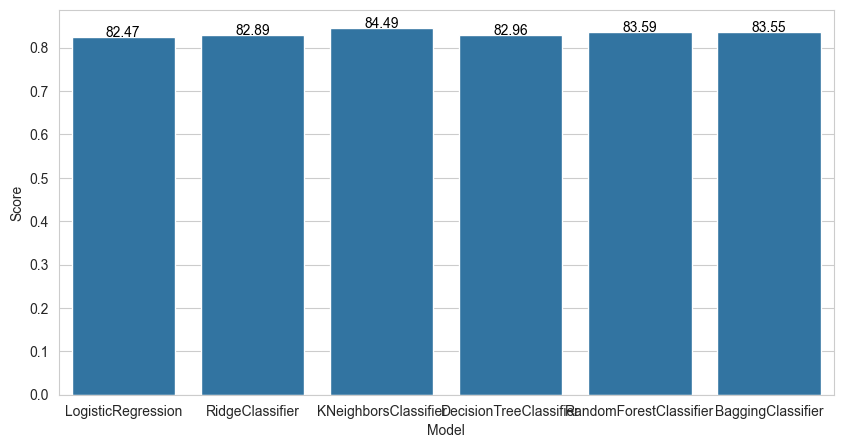

In [296]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='Model', y='Score', data=model_result)

for index, row in model_result.iterrows():
    g.text(row.name,row.Score, round(row.Score*100,2), color='black', ha="center")
plt.show()

In [297]:
model_result

Model     Score  \
0      LogisticRegression  0.824677   
1         RidgeClassifier  0.828936   
2    KNeighborsClassifier  0.844891   
3  DecisionTreeClassifier  0.829628   
4  RandomForestClassifier  0.835918   
5       BaggingClassifier  0.835471   

                                          Parameters  
0  {'C': 14, 'penalty': 'l1', 'solver': 'liblinear'}  
1                                    {'alpha': 1.13}  
2  {'algorithm': 'auto', 'metric': 'manhattan', '...  
3  {'max_depth': 6, 'max_features': 'log2', 'min_...  
4      {'max_features': 'sqrt', 'n_estimators': 100}  
5                             {'n_estimators': 1000}

# Stacking Classifier

In [312]:
# define base learner models
level0 = list()
level0.append(('rd', RidgeClassifier(alpha= 1.13)))
level0.append(('kn', KNeighborsClassifier(algorithm='auto', leaf_size=6, n_neighbors=11, metric='manhattan', weights='uniform')))
level0.append(('dt', DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=4, min_samples_split=3)))
level0.append(('rf', RandomForestClassifier(max_features='sqrt', n_estimators=100)))
level0.append(('bc', BaggingClassifier(n_estimators=1000)))
level0.append(('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7)))
# define meta learner model
level1 = LogisticRegression(C=14, penalty='l1',solver= 'liblinear')

In [313]:
stacking_clf = StackingClassifier(estimators=level0, final_estimator=level1,n_jobs=-1)

In [314]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rd', RidgeClassifier(alpha=1.13)),
                               ('kn',
                                KNeighborsClassifier(leaf_size=6,
                                                     metric='manhattan',
                                                     n_neighbors=11)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       max_features='log2',
                                                       min_samples_leaf=4,
                                                       min_samples_split=3)),
                               ('rf', RandomForestClassifier()),
                               ('bc', BaggingClassifier(n_estimators=1000)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=1000,
                                                           subsample=0.7))],
                   final_estimator=LogisticRegression(C=14, penalty='l1',
                                                      solver='liblinear'),
                   n_jobs=-1)

In [315]:
Stacking_submission = pd.read_csv('./gender_submission.csv')
Stacking_submission.Survived = stacking_clf.predict(X_test)
Stacking_submission['Survived'] = Stacking_submission['Survived'].astype(int)
Stacking_submission.to_csv('Stacking_submission.csv', index=False)

## 채점하기

In [316]:
def score_submission(filename=None):
    # 생성된 데이터 파일과 솔루션 불러오기
    # 파일 경로 적절히 수정해서 쓰세요.
    submission = pd.read_csv(filename)
    solution = pd.read_csv('./solution.csv')

    # 채점 테이블 생성
    marking = submission.merge(solution, on='PassengerId')
    marking.columns = ['PassengerId', 'Submission', 'Solution']

    # 'Check' : 맞으면 1, 틀리면 0 
    marking['Check'] = 0

    # 채점
    cond = marking['Submission'] == marking['Solution']
    marking.loc[cond, 'Check'] = 1

    # 정답 계산 및 출력
    result = marking['Check'].sum() / marking.shape[0]
    print('정답: {0:.5f}'.format(result))
    
    return

In [317]:
models = [
    'LogisticRegression', 'RidgeClassifier', 'KNeighborsClassifier'
    ,'DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier'
    , 'Stacking'
]

for model in models:
    filename = './' + model + '_submission.csv'
    print(f'#### {model} ####')
    score_submission(filename)

#### LogisticRegression ####
정답: 0.77033
#### RidgeClassifier ####
정답: 0.77033
#### KNeighborsClassifier ####
정답: 0.79904
#### DecisionTreeClassifier ####
정답: 0.80383
#### RandomForestClassifier ####
정답: 0.77990
#### BaggingClassifier ####
정답: 0.77990
#### Stacking ####
정답: 0.80622
